<a href="https://colab.research.google.com/github/luiz2801/trabalho_ia/blob/main/atv02_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nessa atividade trabalharemos com o dataset Breast Cancer Wisconsin.
Ele tem como objetivo diagnosticar o câncer de mama com base em diversos parâmetros. Analisando cada parâmetro o algoritmo deve dizer se o tumor é maligno ou benigno, ou seja, a saída esperada é binária.

Para classificar esse problema é necessário definir se o problema é:

Paramétrico ou não paramétrico;

Determinístico ou probabilístico;

Univariado ou multivariado;

Preditivo ou explicativo.

A partir dessas definições podemos definir as regras exigidas no documento:
1. Problema e função objetivo

A partir de entradas físicas como área, maciez e simetria, o modelo tem como objetivo prever casos de câncer. Ao fim do processamento ele retornará um diagnóstico com a chance do paciente ter, ou não, câncer. A função objetivo foi a Pureza de Gini, devido ao uso do modelo de Árvore de Decisão.

2. Natureza

2.1. Paramétrico

Dado que para poder obter uma saída é necessário levar em conta todos os atributos. Por isso,  problema será tratado como paramétrico pois utilizaremos a Árvore de Decisão, que a cada nova entrada, assume um novo estado, até chegar ao diagnóstico final. Após cada etapa de otimização, a função de custo torna os nós mais puros o que pode nos levar a uma convergência maior.

2.2. Determinístico

Dada as limitações do target do dataset, um modelo determinístico é mais facilmente modelado. Seria possível construir um modelo probabilístico, porém devido à limitações de equipe e tempo a maneira mais viável de modelar seria o determinístico.

2.3. Multivariado

A natureza é multivariada, pois o diagnóstico não pode ser determinado por uma única característica isolada.

2.4. Preditivo

O foco primordial é preditivo, visando a máxima acurácia na detecção do câncer.

3. Escolha do algoritmo

Para solucionar esse problema foi decidido utilizar o algoritmo de árvores de decisão. Como a árvore permite verificar seus estados a cada nó, suas ações são verificáveis.

4. Entradas e pré-processamente

4.1 Entradas

Características numéricas contínuas como raio, textura, perímetro e área.

4.2  Engenharia de Atributos

Foi criada a feature area_perimeter_ratio para capturar a irregularidade da forma tumoral.

4.3  Limpeza

Remoção das colunas 'mean area' e 'mean perimeter' para evitar multicolinearidade.

4.4 Divisão de Dados

 80% para treino e 20% para teste, com estratificação para manter a proporção das classes, dado que o dataset é desbalanceado.

 5. Saída e métricas

 A saída será um binário, uma definição se o câncer é malígno ou benígno. As métricas utilizadas são acurácia e F1-Score.




In [184]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


## Carregar Dataset


In [185]:


# 1. dataset
cancer_data = load_breast_cancer()

# 2. DataFrame com as features
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# 3. target no DataFrame
df['target'] = cancer_data.target

## Engenharia de Atributos

Criação do atributo novo, a proporção da área pelo perímetro. Como a área e o perímetro são altamente relacionados é possível usar somente um atributo para ambos, resuzindo a complexidade do modelo.


In [186]:
df['area_perimeter_ratio'] = df['mean area'] / df['mean perimeter'] # novo atributo
df = df.drop(columns=['mean area', 'mean perimeter']) # remoção dos atributos que foram usados na criação de area_perimeter_ratio

##Divisão dos dados



In [187]:

# Separarando features e target
X = df.drop('target', axis=1)
y = df['target']


# divisão de dados para treino e teste -> dados treino, dados teste, target treino, target teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101010, stratify=y
)



##Visualização de dados

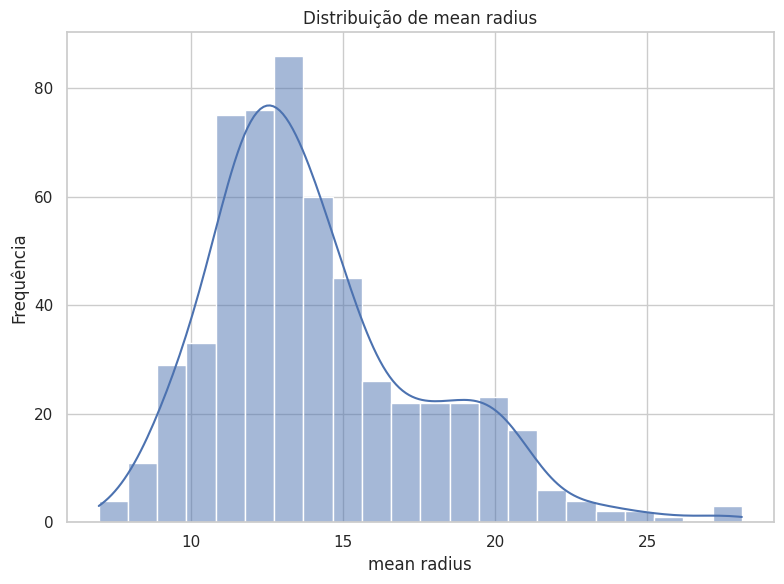

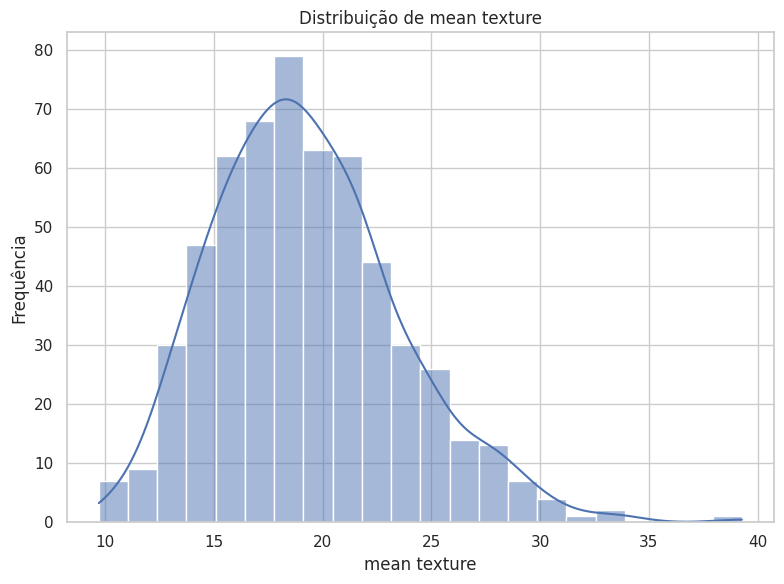

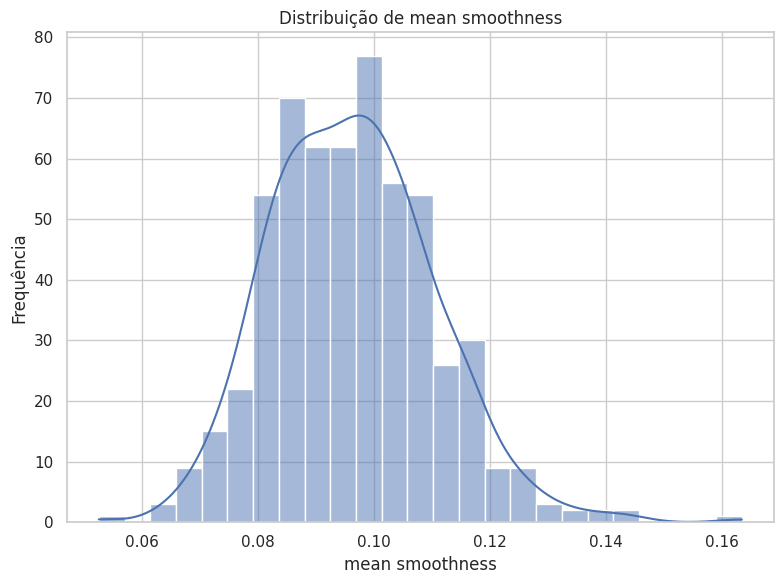

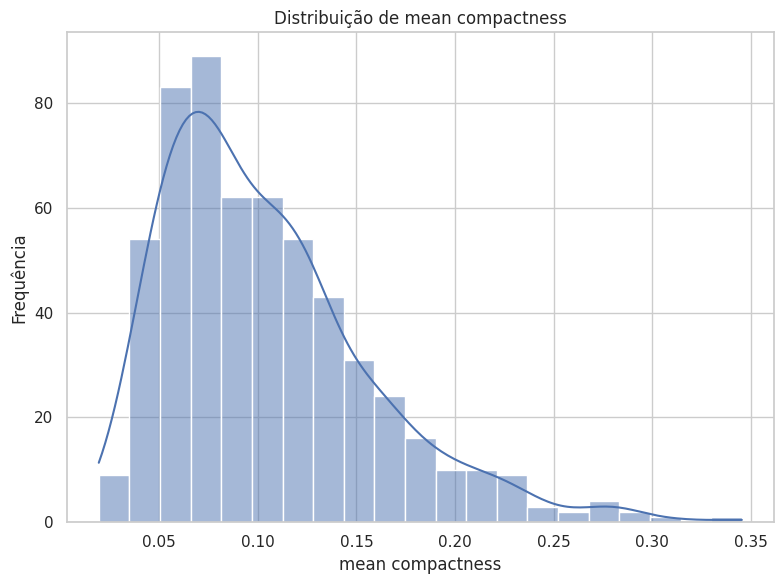

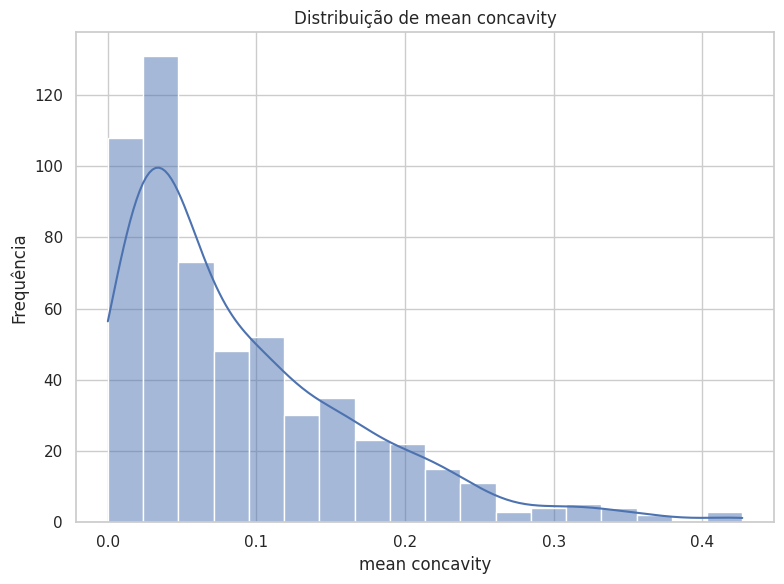

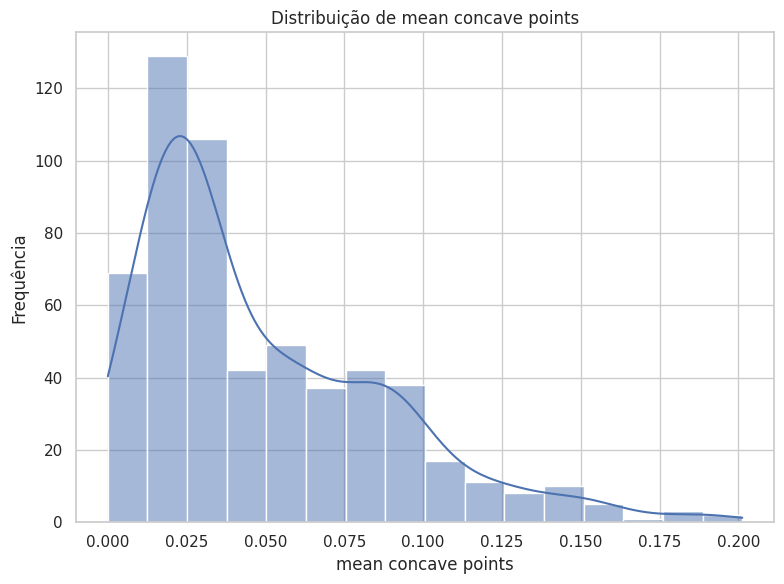

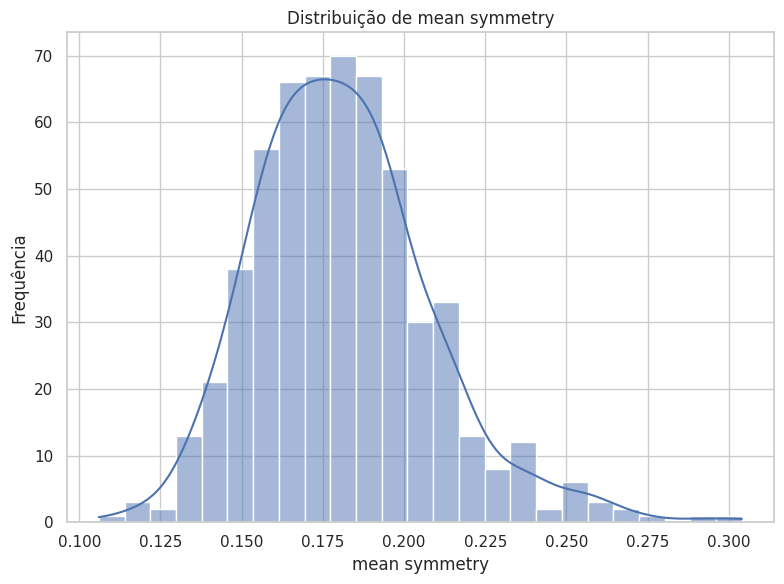

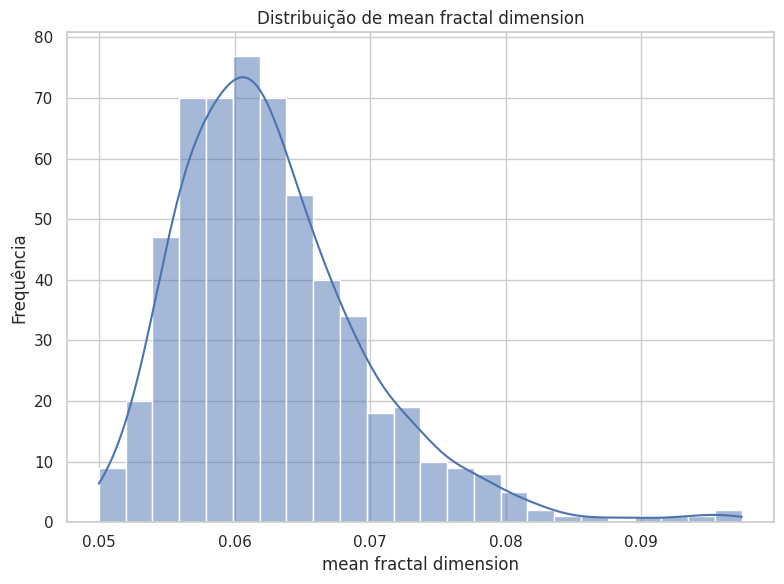

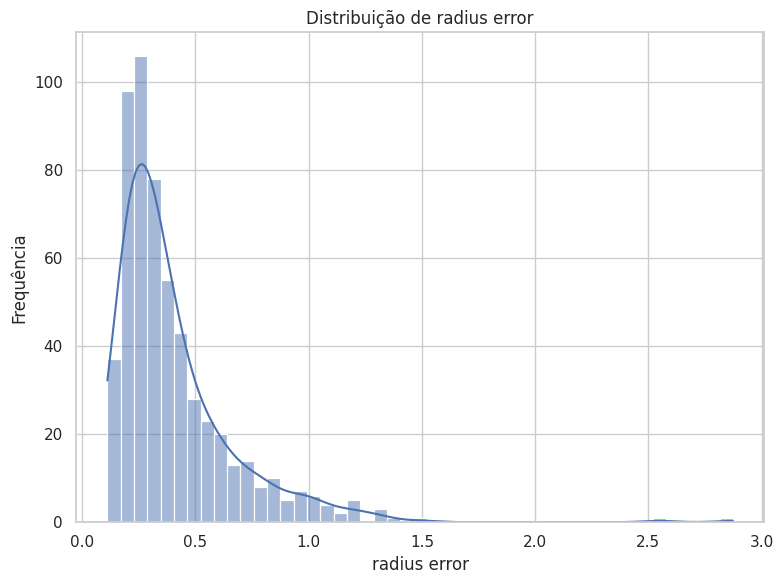

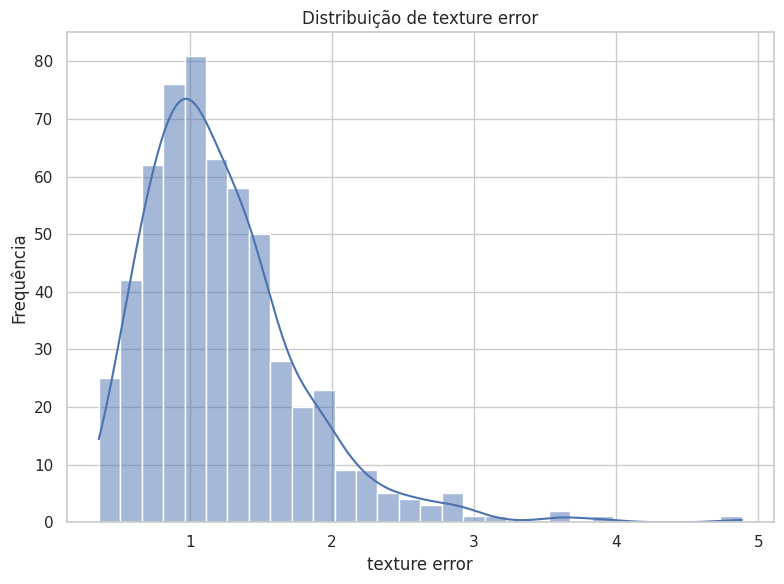

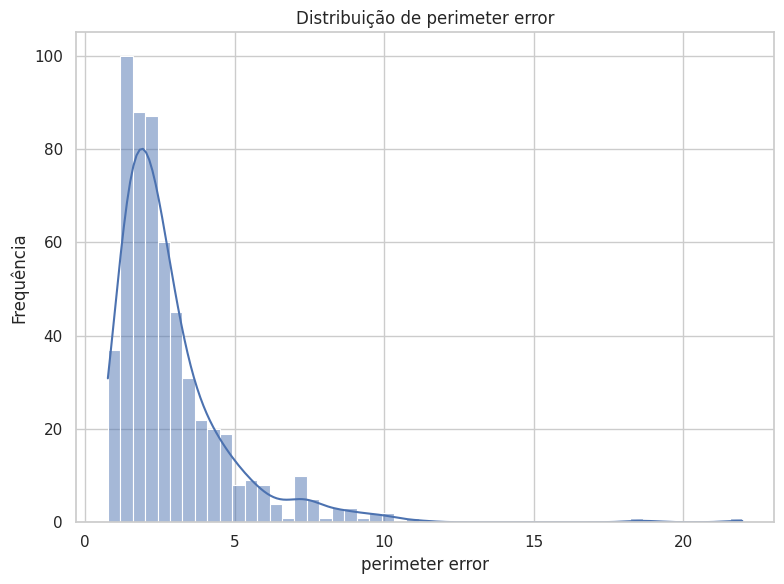

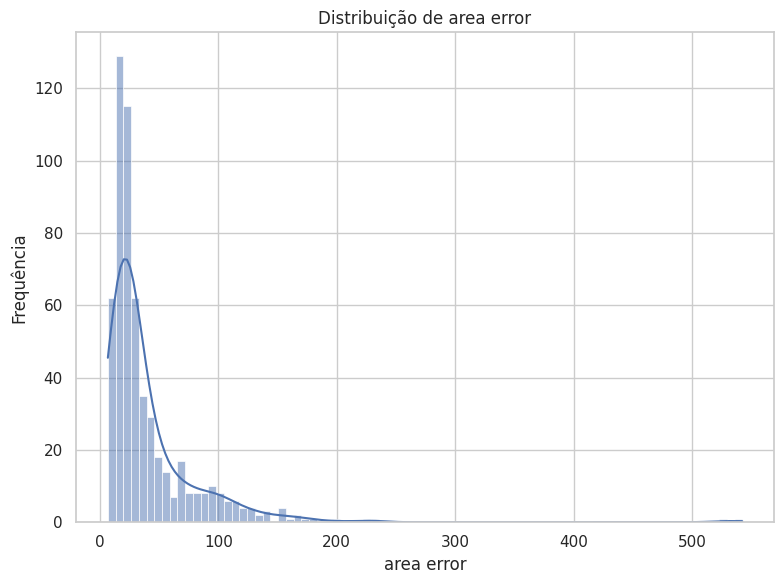

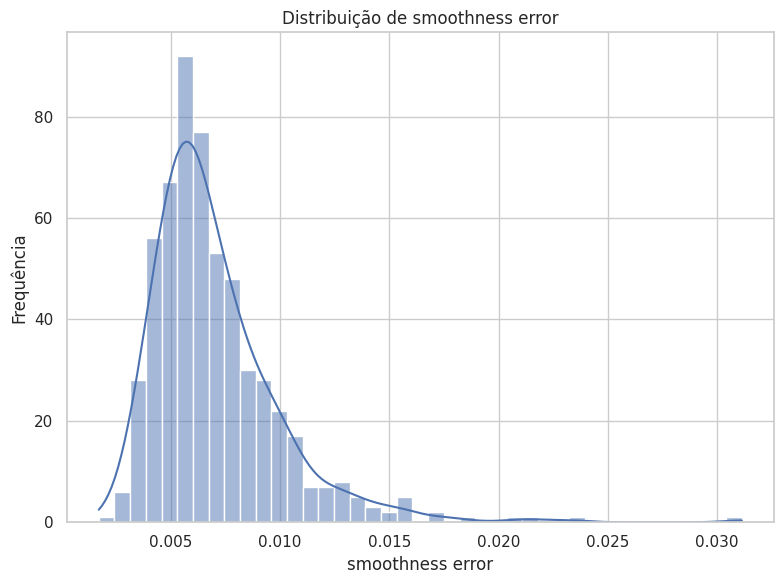

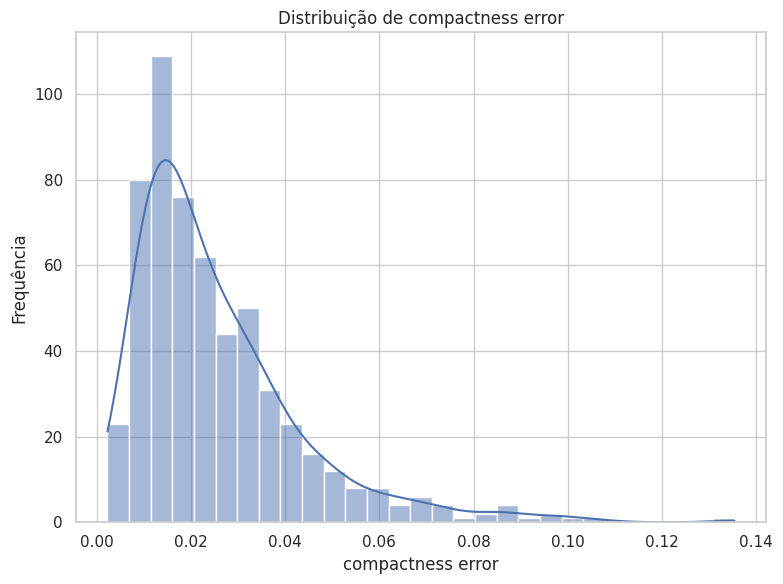

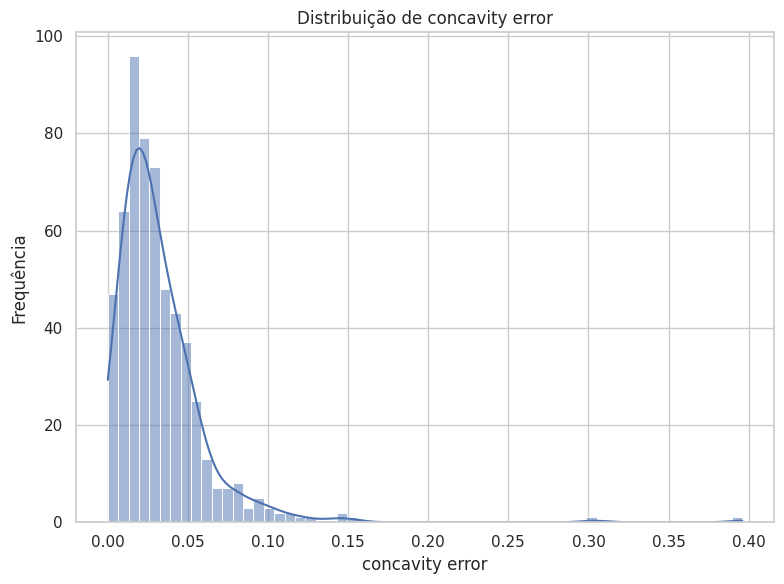

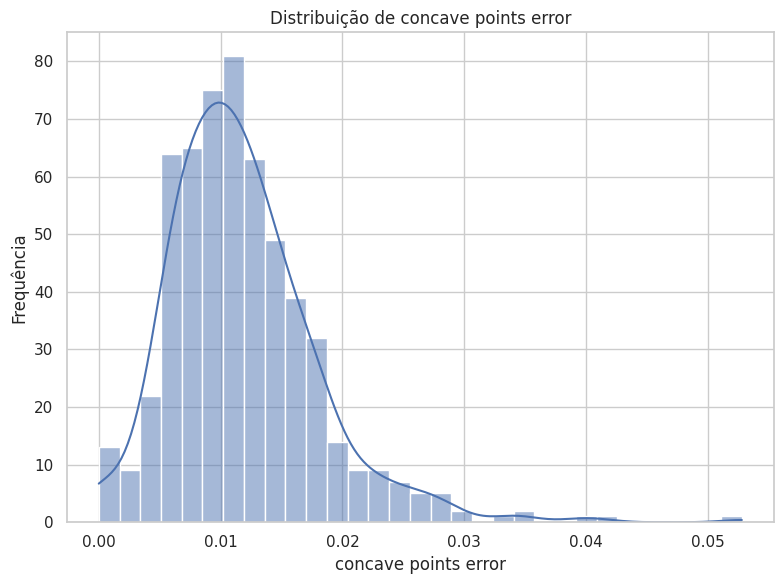

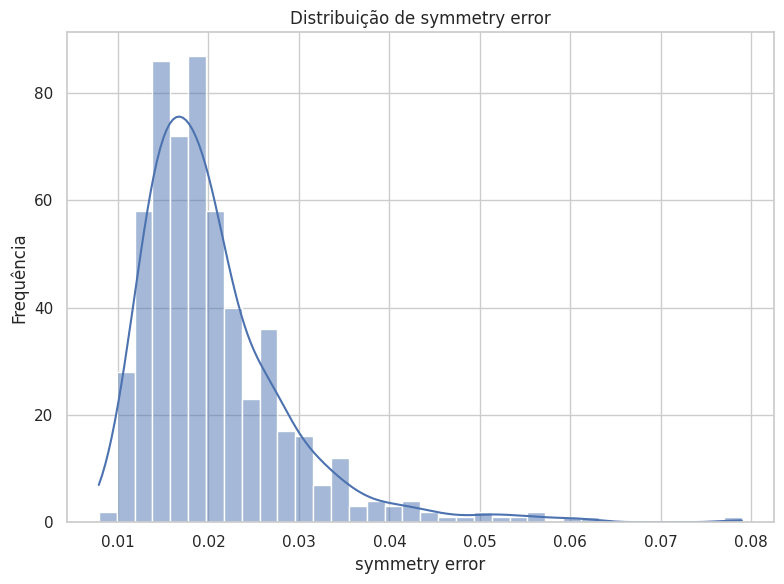

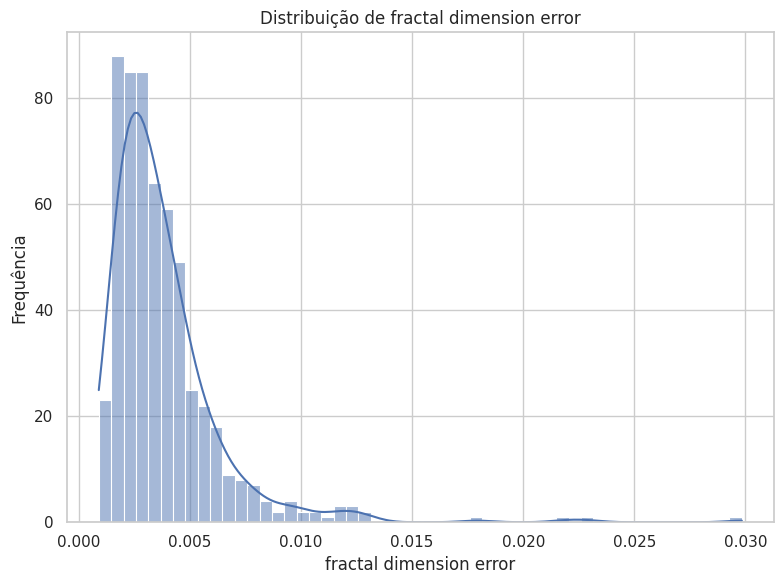

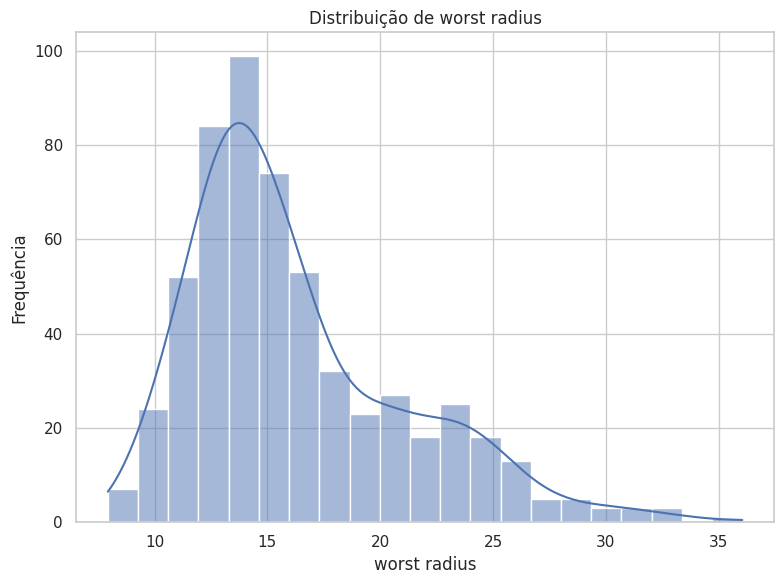

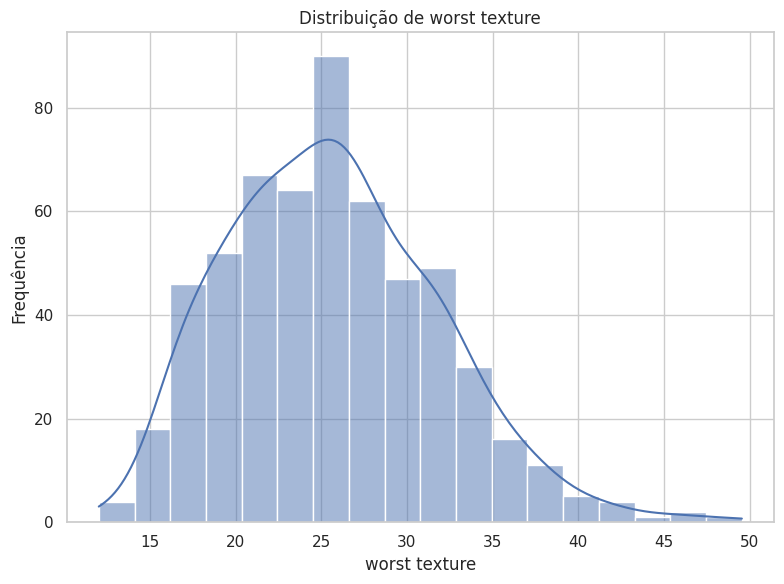

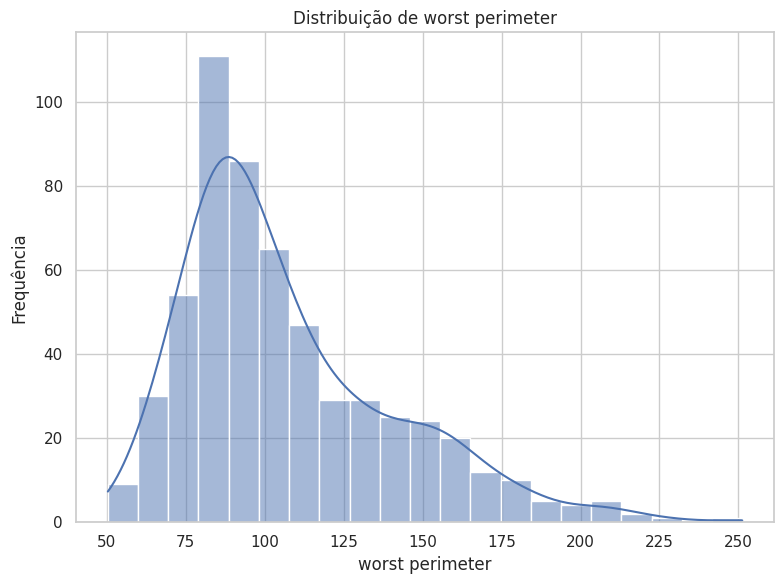

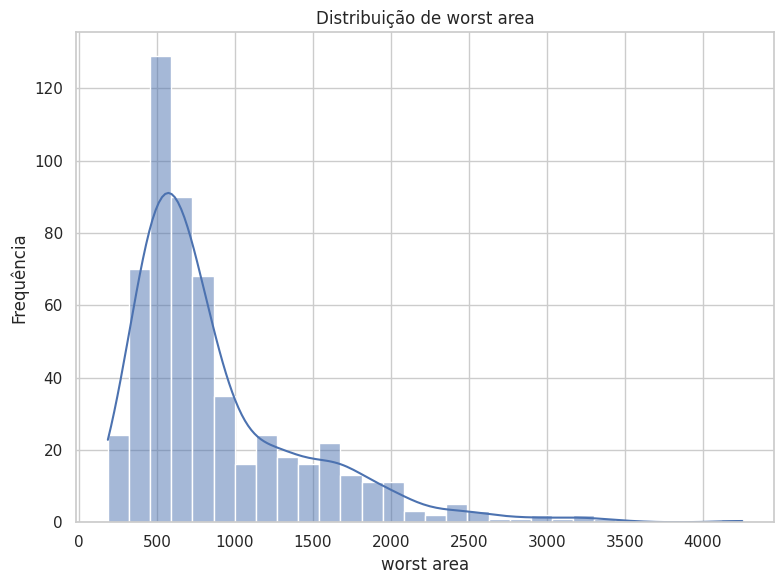

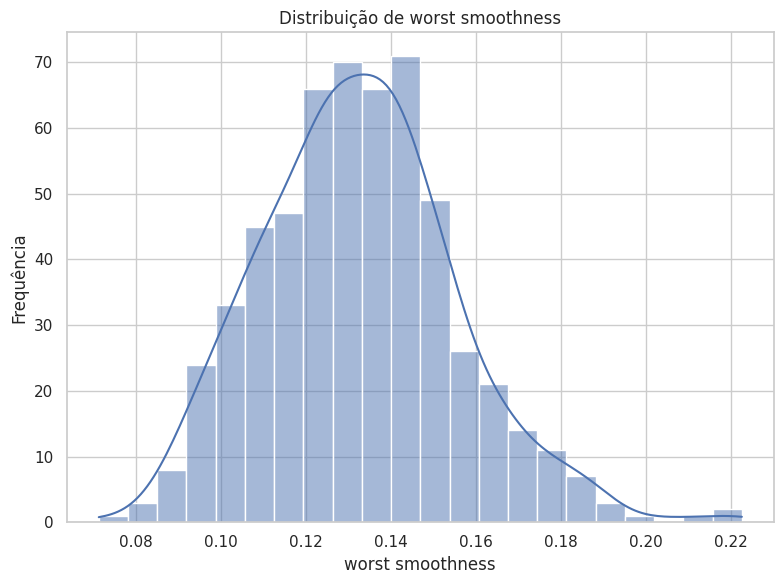

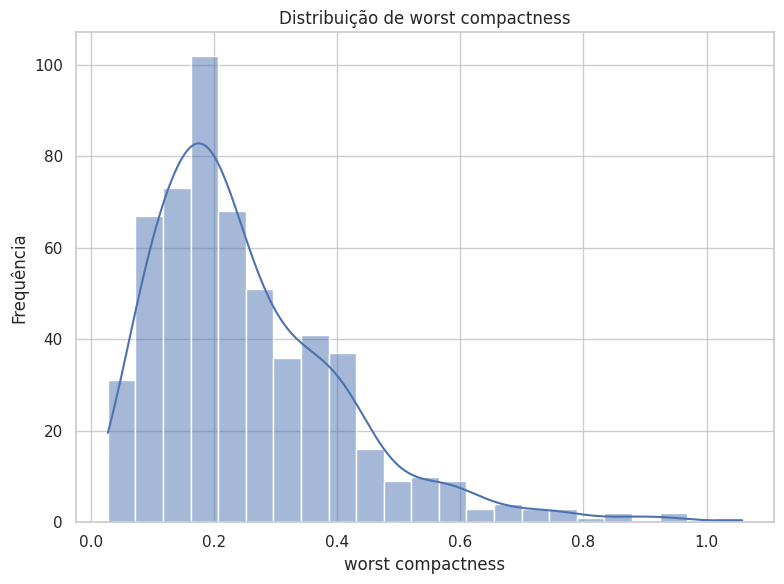

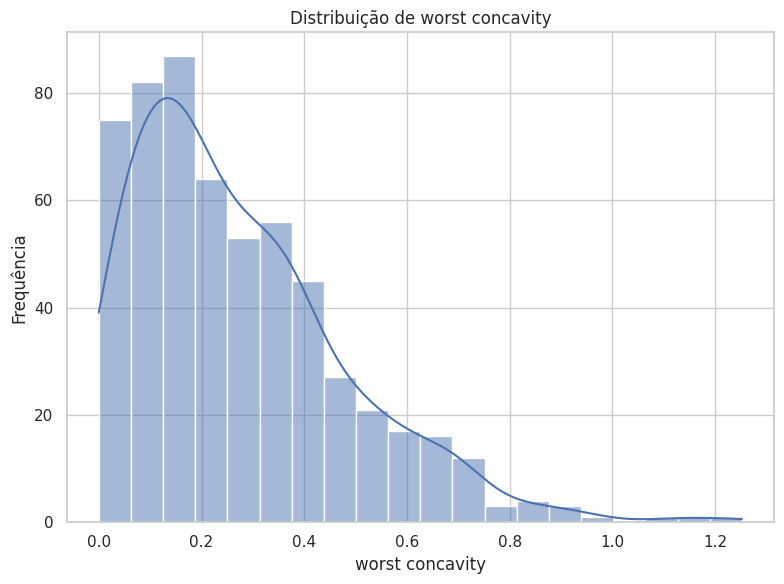

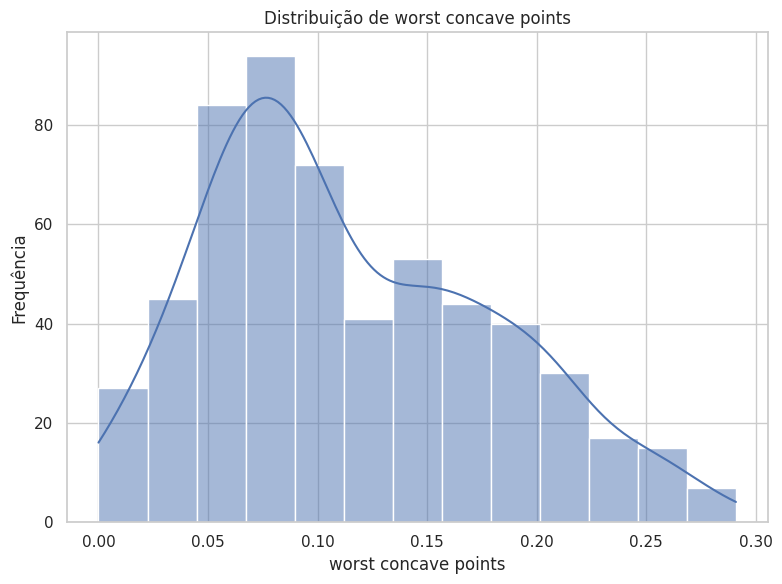

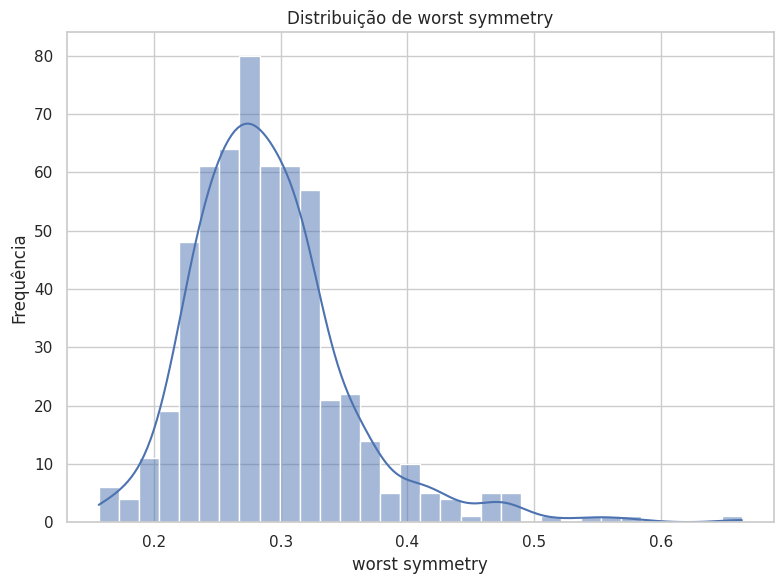

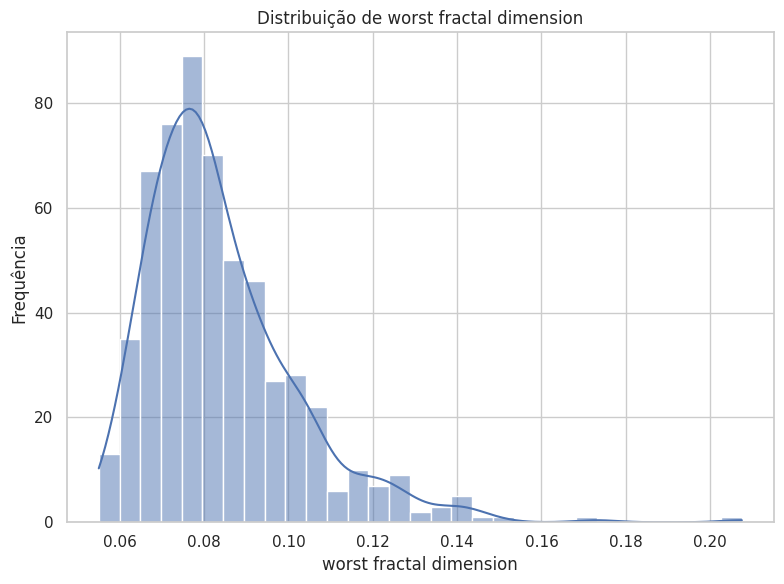

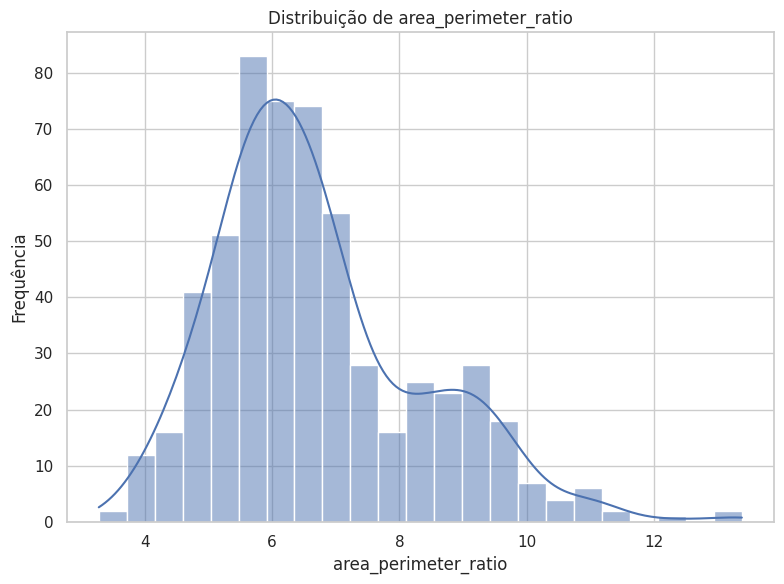

In [188]:
features = X.columns

for i, col in enumerate(features):
    plt.figure(figsize=(8, 6))
    sns.histplot(X[col], kde=True) # Usando histplot para ver a densidade
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

##Treinamento

In [189]:

dt =  DecisionTreeRegressor(max_depth=30, random_state=101010)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

## Visualização das Métricas (Acurácia e F1-Score)

Acurácia: 0.9386
F1-Score: 0.9504


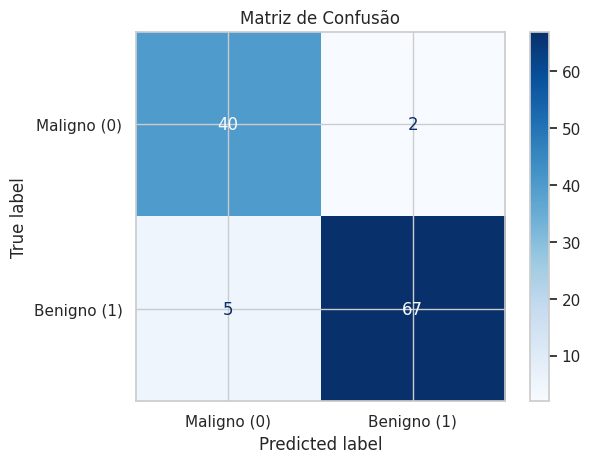

In [190]:

y_pred_binary = (y_pred_dt >= 0.5).astype(int)

# Calcular métricas de classificação
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Acurácia: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

#  Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_binary, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Maligno (0)', 'Benigno (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

## Visualização das Métricas (Acurácia e F1-Score)

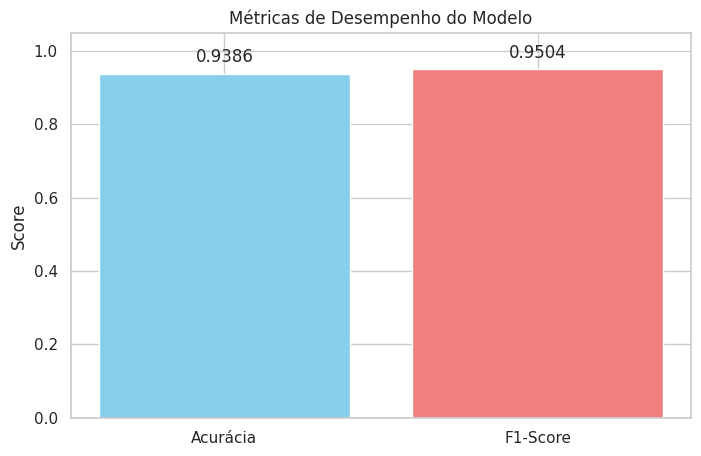

In [191]:
metrics = ['Acurácia', 'F1-Score']
scores = [accuracy, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightcoral'])
plt.ylim(0.0, 1.05)
plt.title('Métricas de Desempenho do Modelo')
plt.ylabel('Score')
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.4f}', ha='center', va='bottom')
plt.show()